In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

In [2]:
df=pd.read_csv("home_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df.drop(["id","date"],axis=1,inplace=True)

In [5]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.nunique()

price            4032
bedrooms           13
bathrooms          30
sqft_living      1038
sqft_lot         9782
floors              6
waterfront          2
view                5
condition           5
grade              12
sqft_above        946
sqft_basement     306
yr_built          116
yr_renovated       70
zipcode            70
lat              5034
long              752
sqft_living15     777
sqft_lot15       8689
dtype: int64

This shows unique values for each of the features

In [7]:
df.rename(columns={"yr_built":"age_house"},inplace=True)
df["age_house"]=2024-df["age_house"]


In [8]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age_house,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,69,0,98178,47.5112,-122.257,1340,5650
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,73,1991,98125,47.7210,-122.319,1690,7639
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,91,0,98028,47.7379,-122.233,2720,8062
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,59,0,98136,47.5208,-122.393,1360,5000
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,37,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,15,0,98103,47.6993,-122.346,1530,1509
21609,400000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,10,0,98146,47.5107,-122.362,1830,7200
21610,402101,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,15,0,98144,47.5944,-122.299,1020,2007
21611,400000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,20,0,98027,47.5345,-122.069,1410,1287


In [9]:
df.rename(columns={"yr_renovated":"renovated"},inplace=True)

In [10]:
df["renovated"]=df["renovated"].apply(lambda x:0 if x==0 else 1)

In [11]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age_house,renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,69,0,98178,47.5112,-122.257,1340,5650
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,73,1,98125,47.7210,-122.319,1690,7639
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,91,0,98028,47.7379,-122.233,2720,8062
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,59,0,98136,47.5208,-122.393,1360,5000
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,37,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,15,0,98103,47.6993,-122.346,1530,1509
21609,400000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,10,0,98146,47.5107,-122.362,1830,7200
21610,402101,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,15,0,98144,47.5944,-122.299,1020,2007
21611,400000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,20,0,98027,47.5345,-122.069,1410,1287


In [12]:
df["bathrooms"]=df["bathrooms"].astype(int)

In [13]:
df["floors"]=df["floors"].astype(int)

In [14]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age_house,renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1,1180,5650,1,0,0,3,7,1180,0,69,0,98178,47.5112,-122.257,1340,5650
1,538000,3,2,2570,7242,2,0,0,3,7,2170,400,73,1,98125,47.7210,-122.319,1690,7639
2,180000,2,1,770,10000,1,0,0,3,6,770,0,91,0,98028,47.7379,-122.233,2720,8062
3,604000,4,3,1960,5000,1,0,0,5,7,1050,910,59,0,98136,47.5208,-122.393,1360,5000
4,510000,3,2,1680,8080,1,0,0,3,8,1680,0,37,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000,3,2,1530,1131,3,0,0,3,8,1530,0,15,0,98103,47.6993,-122.346,1530,1509
21609,400000,4,2,2310,5813,2,0,0,3,8,2310,0,10,0,98146,47.5107,-122.362,1830,7200
21610,402101,2,0,1020,1350,2,0,0,3,7,1020,0,15,0,98144,47.5944,-122.299,1020,2007
21611,400000,3,2,1600,2388,2,0,0,3,8,1600,0,20,0,98027,47.5345,-122.069,1410,1287


In [15]:
df["sqft_living"]=df["sqft_living"]/df["sqft_living"].max()
df["sqft_lot"]=df["sqft_lot"]/df["sqft_lot"].max()
df["sqft_above"]=df["sqft_above"]/df["sqft_above"].max()
df["sqft_basement"]=df["sqft_basement"]/df["sqft_basement"].max()
df["sqft_living15"]=df["sqft_living15"]/df["sqft_living15"].max()
df["sqft_lot15"]=df["sqft_lot15"]/df["sqft_lot15"].max()
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age_house,renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1,0.087149,0.003421,1,0,0,3,7,0.125399,0.000000,69,0,98178,47.5112,-122.257,0.215781,0.006485
1,538000,3,2,0.189808,0.004385,2,0,0,3,7,0.230606,0.082988,73,1,98125,47.7210,-122.319,0.272142,0.008768
2,180000,2,1,0.056869,0.006056,1,0,0,3,6,0.081828,0.000000,91,0,98028,47.7379,-122.233,0.438003,0.009254
3,604000,4,3,0.144756,0.003028,1,0,0,5,7,0.111583,0.188797,59,0,98136,47.5208,-122.393,0.219002,0.005739
4,510000,3,2,0.124077,0.004893,1,0,0,3,8,0.178533,0.000000,37,0,98074,47.6168,-122.045,0.289855,0.008612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000,3,2,0.112999,0.000685,3,0,0,3,8,0.162593,0.000000,15,0,98103,47.6993,-122.346,0.246377,0.001732
21609,400000,4,2,0.170606,0.003520,2,0,0,3,8,0.245484,0.000000,10,0,98146,47.5107,-122.362,0.294686,0.008264
21610,402101,2,0,0.075332,0.000818,2,0,0,3,7,0.108395,0.000000,15,0,98144,47.5944,-122.299,0.164251,0.002304
21611,400000,3,2,0.118168,0.001446,2,0,0,3,8,0.170032,0.000000,20,0,98027,47.5345,-122.069,0.227053,0.001477


In [16]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age_house,renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,1.749734,0.153612,0.009148,1.446213,0.007542,0.234303,3.409430,7.656873,0.190052,0.060479,52.994864,0.042289,98077.939805,47.560053,-122.213896,0.319896,0.014656
std,3.671272e+05,0.930062,0.734873,0.067832,0.025083,0.551894,0.086517,0.766318,0.650743,1.175459,0.088001,0.091821,29.373411,0.201253,53.505026,0.138564,0.140828,0.110369,0.031341
min,7.500000e+04,0.000000,0.000000,0.021418,0.000315,1.000000,0.000000,0.000000,1.000000,1.000000,0.030818,0.000000,9.000000,0.000000,98001.000000,47.155900,-122.519000,0.064251,0.000747
25%,3.219500e+05,3.000000,1.000000,0.105391,0.003052,1.000000,0.000000,0.000000,3.000000,7.000000,0.126461,0.000000,27.000000,0.000000,98033.000000,47.471000,-122.328000,0.239936,0.005854
50%,4.500000e+05,3.000000,2.000000,0.141064,0.004613,1.000000,0.000000,0.000000,3.000000,7.000000,0.165781,0.000000,49.000000,0.000000,98065.000000,47.571800,-122.230000,0.296296,0.008747
75%,6.450000e+05,4.000000,2.000000,0.188331,0.006472,2.000000,0.000000,0.000000,4.000000,8.000000,0.234857,0.116183,73.000000,0.000000,98118.000000,47.678000,-122.125000,0.380032,0.011574
max,7.700000e+06,33.000000,8.000000,1.000000,1.000000,3.000000,1.000000,4.000000,5.000000,13.000000,1.000000,1.000000,124.000000,1.000000,98199.000000,47.777600,-121.315000,1.000000,1.000000


As there is no categorical values present in the features 

In [17]:
df.corr()["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.510072
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.237211
renovated        0.126092
sqft_lot         0.089661
sqft_lot15       0.082447
condition        0.036362
long             0.021626
zipcode         -0.053203
age_house       -0.054012
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

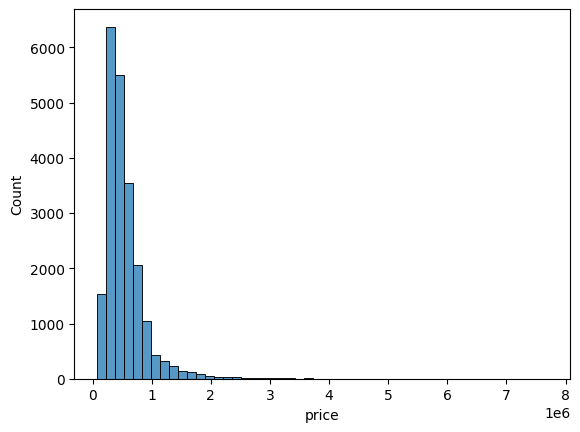

In [18]:
sns.histplot(df["price"],bins=50)

In [19]:
df["grade"].value_counts()

grade
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: count, dtype: int64

<Axes: >

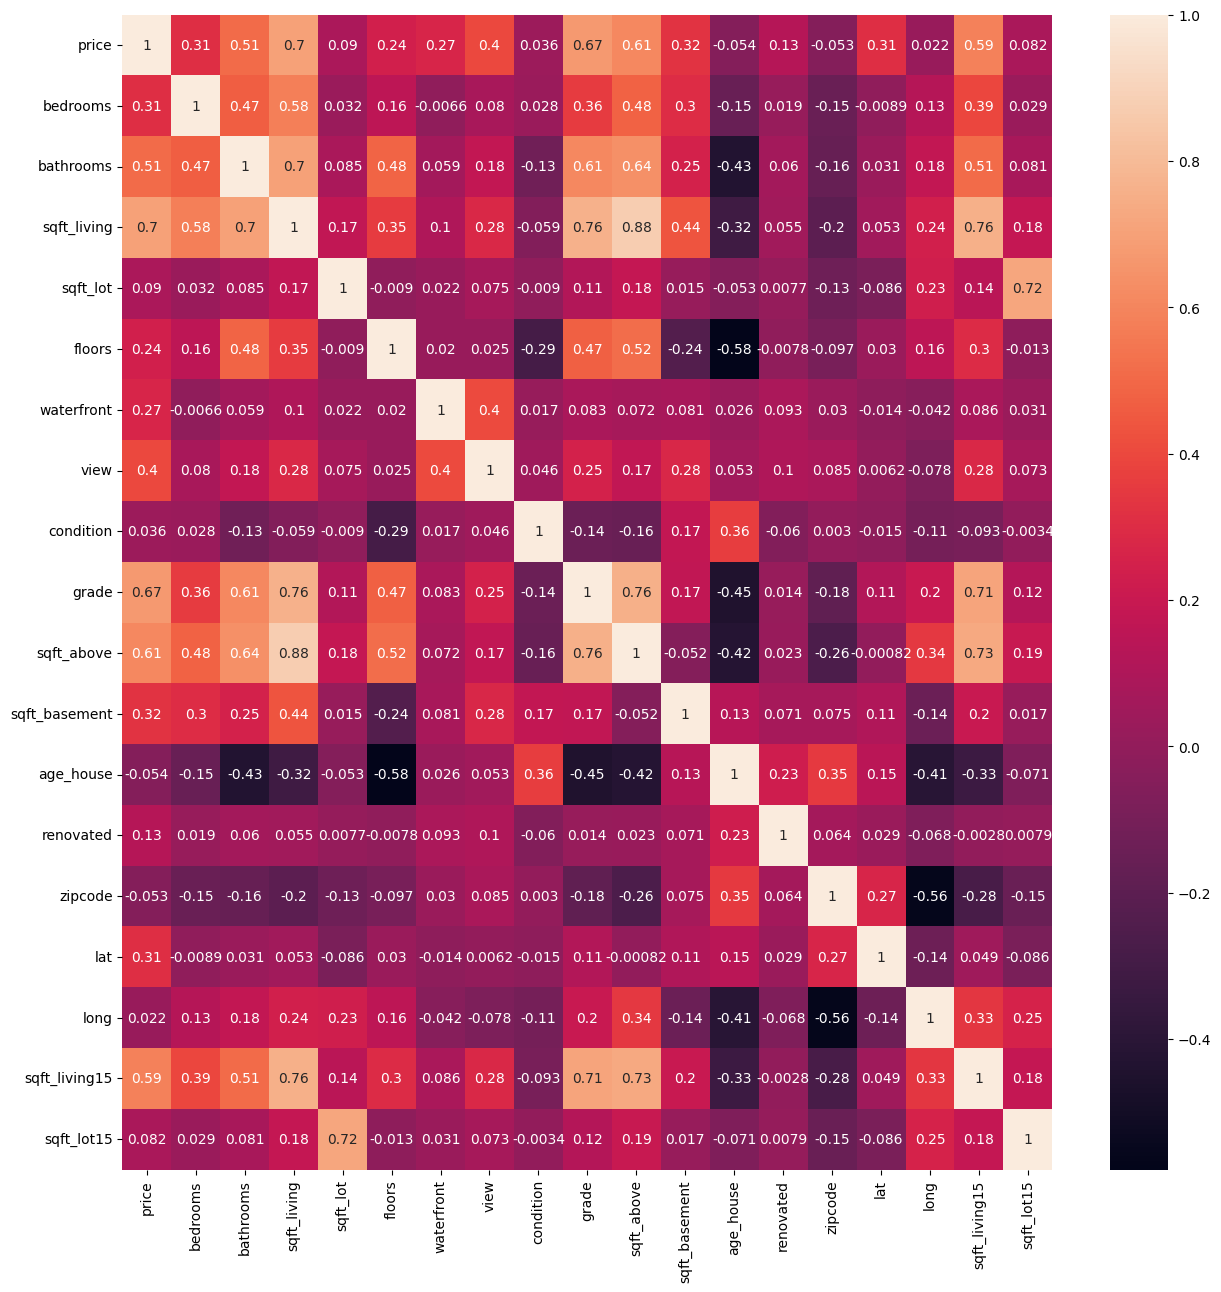

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

<Axes: >

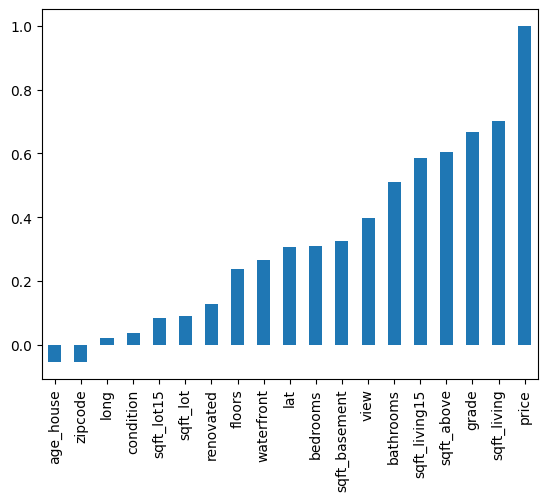

In [21]:
df.corr()["price"].sort_values().plot(kind="bar")

<Axes: xlabel='sqft_lot', ylabel='price'>

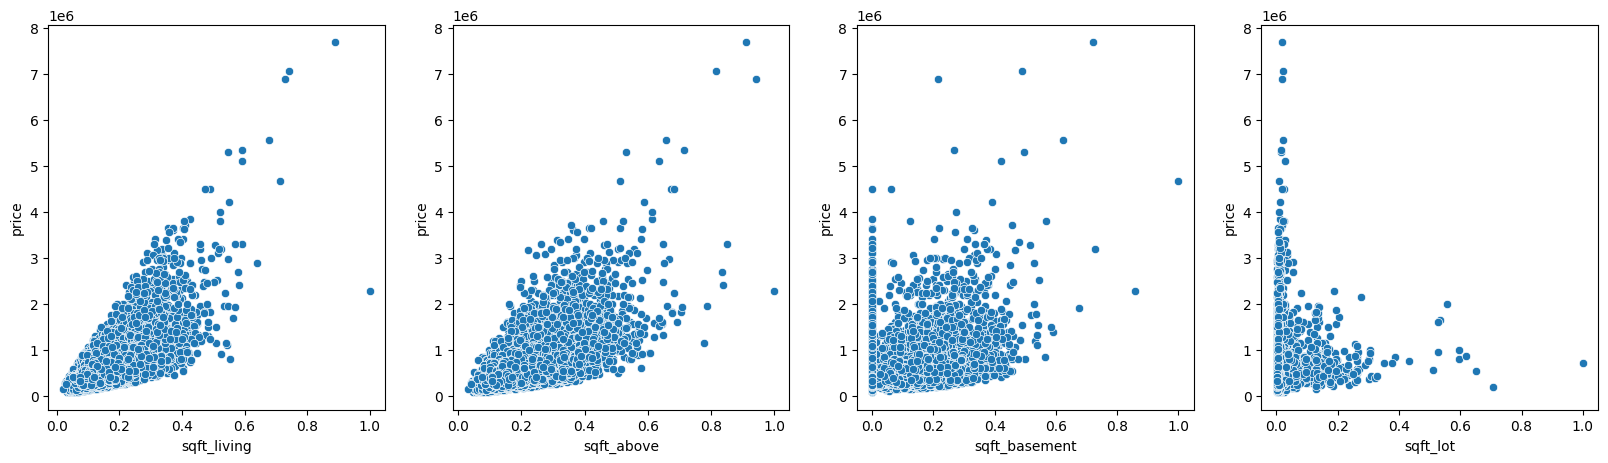

In [22]:
fig,ax=plt.subplots(1,4,figsize=(20,5))
sns.scatterplot(x=df["sqft_living"],y=df["price"],ax=ax[0])
sns.scatterplot(x=df["sqft_above"],y=df["price"],ax=ax[1])
sns.scatterplot(x=df["sqft_basement"],y=df["price"],ax=ax[2])
sns.scatterplot(x=df["sqft_lot"],y=df["price"],ax=ax[3])

<Axes: xlabel='view', ylabel='price'>

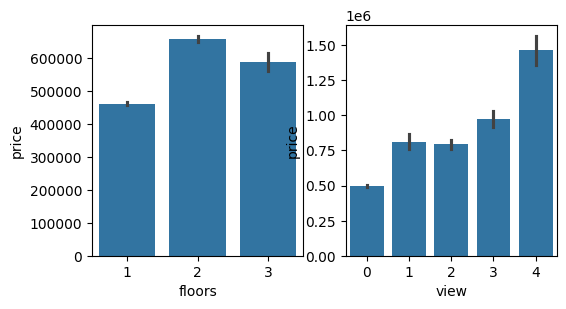

In [23]:
fig,ax=plt.subplots(1,2,figsize=(6,3))
sns.barplot(x=df["floors"],y=df["price"],ax=ax[0])
sns.barplot(x=df["view"],y=df["price"],ax=ax[1])

For the building a model on the data we have to split the data into test and train data in proportion of 30% and 70% respectively

In [24]:
model=X_train,X_test,y_train,y_test=train_test_split(df.drop("price",axis=1),df["price"],test_size=0.3,random_state=10)

In [25]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [26]:
y_pred=model.predict(X_test)
y_pred

array([ 347894.4951644 ,  590101.19269149, -531474.87875529, ...,
        539888.71662711,  615619.97970946,  560159.11410855])

In [27]:
train_score=model.score(X_train,y_train)
test_score=model.score(X_test,y_test)
print(train_score)
print(test_score)

0.6962087554140572
0.7123225483949618


In [28]:
r2_score(y_test,y_pred)

NameError: name 'r2_score' is not defined

In [29]:
r_model=Ridge(alpha=0.001)
r_model.fit(X_train,y_train)

Ridge(alpha=0.001)

In [30]:
r_train_score=r_model.score(X_train,y_train)
r_test_score=r_model.score(X_test,y_test)
print(r_train_score)
print(r_test_score)

0.6962087553761883
0.7123220593275169


In [31]:
r_pred=r_model.predict(X_test)

In [41]:
bedrooms=2
bathrooms=2
sqft_living=4000
sqft_lot=20000
floors=2
waterfront=0
view=1
condition=3
grade=8
sqft_above=2000
sqft_basement=0
yr_built=1990
yr_renovated=0
zipcode=97001
lat=69.4480
long=-142.9836
sqft_living15=2000
sqft_lot15=10000


In [42]:
price=model.predict([[bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15]])
print(price[0])

5050646180.782975


C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [37]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=100, random_state=0)
regressor

RandomForestRegressor(random_state=0)

In [38]:
regressor.fit(X_train,y_train)
regressor.score(X_test,y_test)

0.878968081057204

In [46]:
rm_pred=regressor.predict(X_test)

In [43]:
price=regressor.predict([[bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15]])
print(price[0])

893559.9933333334


C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


***PLOTTING THE PREDICTED AND ACTUAL VALUES***

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_28544\1628766275.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,ax=ax[0])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_28544\1628766275.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,ax=ax[0])
C:\Users\LENOVO\AppData\Local\Temp

Text(0.5, 1.0, 'Ridge Regression')

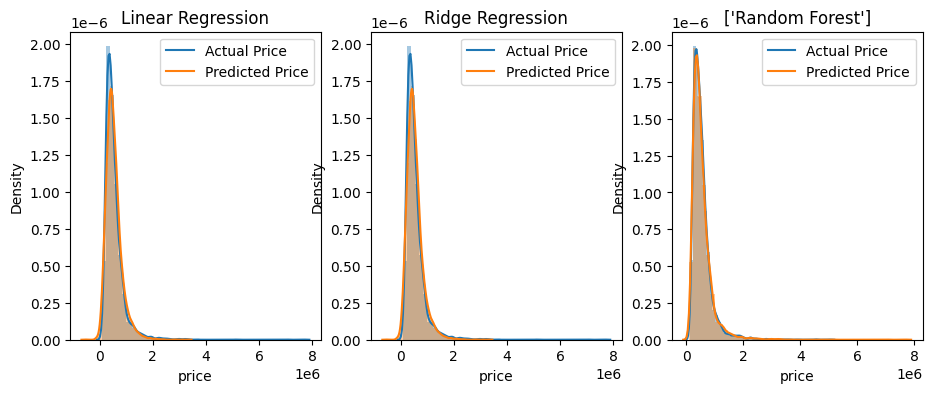

In [64]:
fig,ax=plt.subplots(1,3,figsize=(11,4))
sns.distplot(y_test,ax=ax[0])
sns.distplot(y_pred,ax=ax[0])
sns.distplot(y_test,ax=ax[1])
sns.distplot(r_pred,ax=ax[1])
sns.distplot(rm_pred,ax=ax[2])
sns.distplot(y_test,ax=ax[2])
ax[2].set_title(["Random Forest"])
ax[2].legend(['Actual Price','Predicted Price'])
ax[0].legend(['Actual Price','Predicted Price'])
ax[1].legend(['Actual Price','Predicted Price'])
ax[0].set_title('Linear Regression')
ax[1].set_title('Ridge Regression')